In [1]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import pandas as pd
from astropy.cosmology import Planck13
import astropy.units as u

In [2]:
# Load data
GAMA = fits.open('/home/farnoosh/farnoosh/Master_Thesis_all/Data/GAMA/merged/gkvscienceStellarmass_Morphology/fullmerged_gkvscienceStellarmass_Morphologyv02_shrinked.fits')[1].data #galaxy
SDSS = fits.open('/home/farnoosh/farnoosh/Master_Thesis_all/Data/SDSS/SDSS_DR7/SDSS_DR7.fits')[1].data  #galaxy
# eFEDS = fits.open('/home/farnoosh/farnoosh/Master_Thesis_all/Data/eFEDS/Mathias_Klug/efeds_members.fit')[1].data    #cluster
eRASS1 = fits.open('/home/farnoosh/farnoosh/Master_Thesis_all/Data/eRASS/merged_primary&optical_clusters/merged_optical_primary_clusters.fits')[1].data #cluster

In [16]:
# Create cluster dataframe
cluster_df_raw = pd.DataFrame({
    'RA': eRASS1['RA'].byteswap().newbyteorder(),
    'Z': eRASS1['BEST_Z'].byteswap().newbyteorder()
})

# Filter out invalid redshift values
cluster_df_raw = cluster_df_raw[cluster_df_raw['Z'] != -9.999]
# Convert RA to radians
cluster_df_raw['RA_rad'] = np.deg2rad(cluster_df_raw['RA'])

# Compute lookback time
cluster_df_raw['lookbacktime'] = Planck13.lookback_time(cluster_df_raw['Z']).to(u.Gyr).value



In [25]:
SDSS_objects = pd.DataFrame({
    'RAcen': SDSS['RAcen'].byteswap().newbyteorder(),
    'Z': SDSS['Z'].byteswap().newbyteorder()
})

# Filter out rows with invalid redshift values
SDSS_objects = SDSS_objects[SDSS_objects['Z'] != -9.999]

# Convert RA to radians and calculate the lookback time
SDSS_objects['RA_rad'] = np.deg2rad(SDSS_objects['RAcen'])
SDSS_objects['lookbacktime'] = Planck13.lookback_time(SDSS_objects['Z']).to(u.Gyr).value

KeyError: "Key 'RA' does not exist."

In [10]:
GAMA_objects = pd.DataFrame({
    'RAcen': GAMA['RAcen'].byteswap().newbyteorder(),
    'Z': GAMA['Z'].byteswap().newbyteorder()
})

# Filter out rows with invalid redshift values
GAMA_objects = GAMA_objects[GAMA_objects['Z'] != -9.999]

# Convert RA to radians and calculate the lookback time
GAMA_objects['RA_rad'] = np.deg2rad(GAMA_objects['RAcen'])
GAMA_objects['lookbacktime'] = Planck13.lookback_time(GAMA_objects['Z']).to(u.Gyr).value

In [11]:
print("SDSS OBJECTS:")
print(SDSS_objects.head())
print('Z_max SDSS:           ', max(SDSS_objects['Z']))
print('lookbacktime_Max_SDSS (Gyr):', max(SDSS_objects['lookbacktime']))

SDSS OBJECTS:
        RAcen         Z    RA_rad  lookbacktime
0  146.714203  0.021275  2.560646      0.302248
1  146.919449  0.213925  2.564228      2.658750
2  146.859833  0.126554  2.563188      1.668871
3  146.763397  0.448645  2.561504      4.804257
4  146.963898  0.055988  2.565004      0.775795
Z_max SDSS:            0.6998667120933533
lookbacktime_Max_SDSS (Gyr): 6.484978735783145


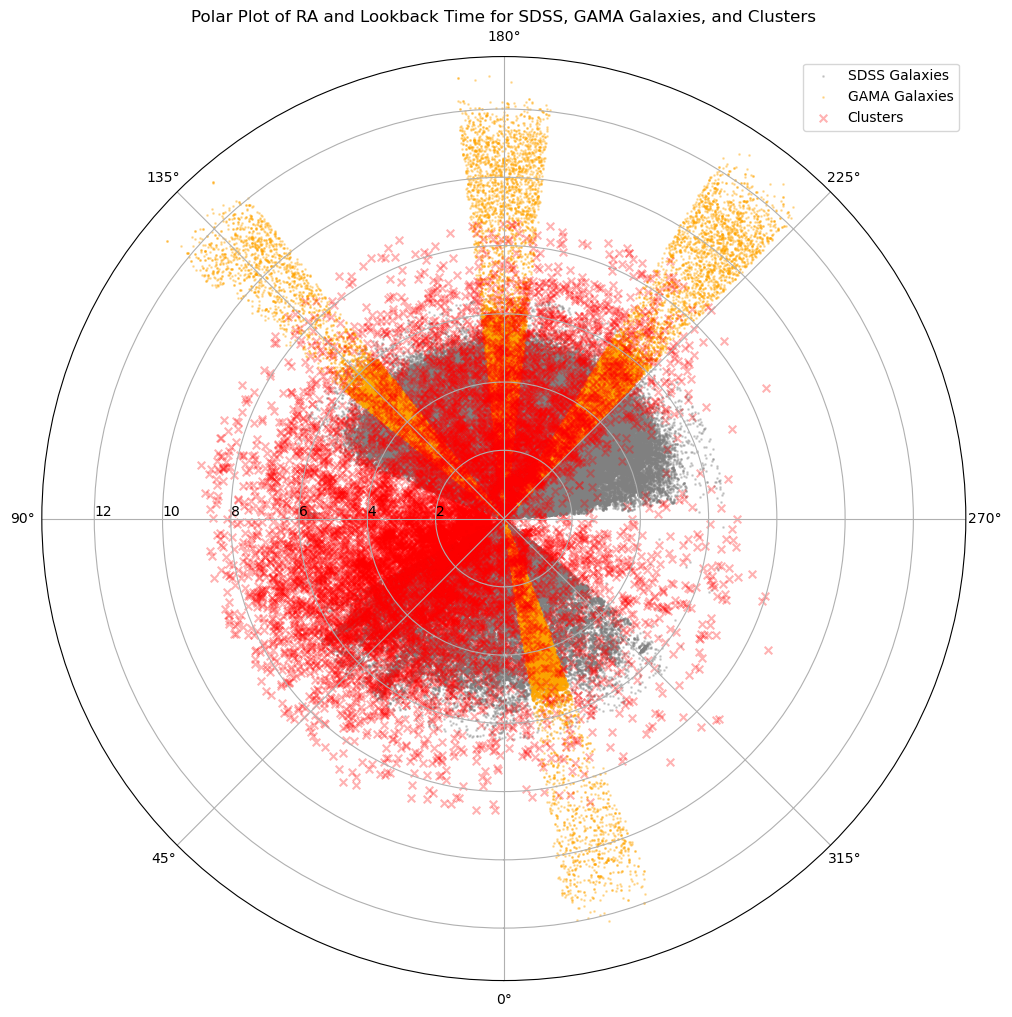

In [13]:
# Polar plot of galaxies and clusters
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(12, 12))

# Plot SDSS galaxies
ax.scatter(
    SDSS_objects['RA_rad'],
    SDSS_objects['lookbacktime'],
    s=1,
    c='gray',
    alpha=0.3,
    label="SDSS Galaxies"
)

# Plot GAMA galaxies
ax.scatter(
    GAMA_objects['RA_rad'],
    GAMA_objects['lookbacktime'],
    s=1,
    c='orange',
    alpha=0.3,
    label="GAMA Galaxies"
)

# Plot clusters
ax.scatter(
    cluster_df_raw['RA_rad'],
    cluster_df_raw['lookbacktime'],
    s=30,  # Larger size for visibility
    c='red',
    alpha=0.3,
    marker='x',
    label="Clusters"
)

# Configure the polar plot
ax.set_theta_direction(-1)
ax.set_theta_zero_location("S")
ax.set_rlabel_position(90)
ax.set_rmax(max(max(SDSS_objects['lookbacktime']), max(GAMA_objects['lookbacktime']), max(cluster_df_raw['lookbacktime'])) + 0.5)
ax.set_rmin(0)
plt.title("Polar Plot of RA and Lookback Time for SDSS, GAMA Galaxies, and Clusters")

# Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.show()


KeyError: "Key 'DEC' does not exist."

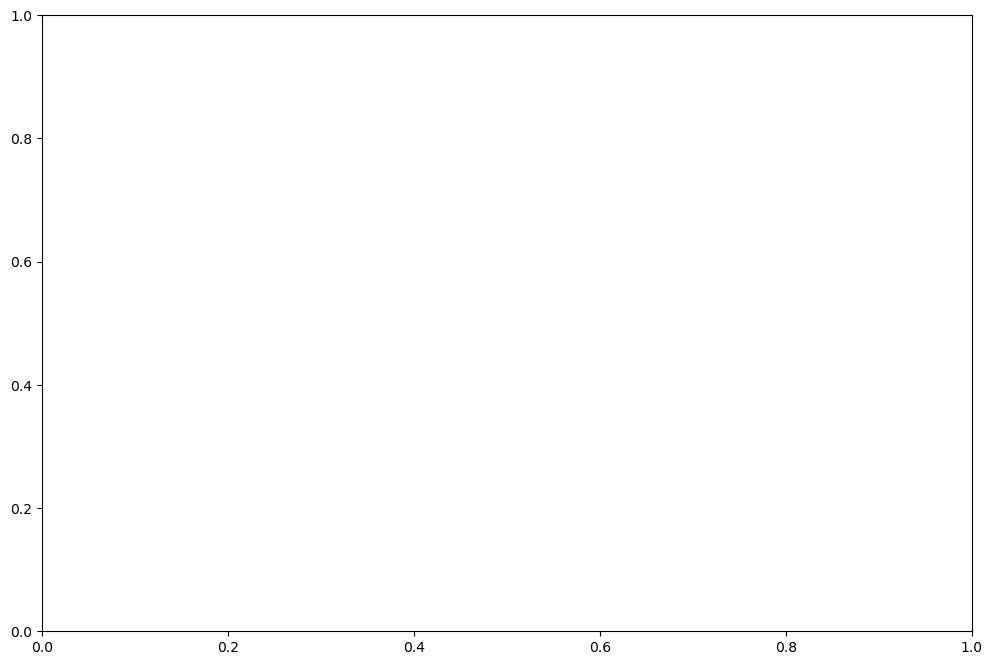

In [14]:
# Create a scatter plot of RA vs. DEC
fig, ax = plt.subplots(figsize=(12, 8))

# Plot SDSS galaxies
ax.scatter(
    SDSS_objects['RAcen'],  # RA in degrees
    SDSS['DEC'].byteswap().newbyteorder(),  # DEC
    s=1,
    c='gray',
    alpha=0.3,
    label="SDSS Galaxies"
)

# Plot GAMA galaxies
ax.scatter(
    GAMA_objects['RAcen'],  # RA in degrees
    GAMA['DEC'].byteswap().newbyteorder(),  # DEC
    s=1,
    c='orange',
    alpha=0.3,
    label="GAMA Galaxies"
)

# Plot clusters
ax.scatter(
    cluster_df_raw['RA'],  # RA in degrees
    eRASS1['DEC'].byteswap().newbyteorder(),  # DEC
    s=30,  # Larger size for visibility
    c='red',
    alpha=0.7,
    marker='x',
    label="Clusters"
)

# Labels and formatting
ax.set_xlabel("Right Ascension (degrees)")
ax.set_ylabel("Declination (degrees)")
ax.set_title("RA vs. DEC Distribution of SDSS, GAMA Galaxies, and Clusters")
ax.legend()
ax.grid(True)

# Show plot
plt.show()
